# CSEG 710- Advanced Algorithms and Data Structures Course Project 

Submission by: Rayyan Ahmed

## Get the network



You must restart the runtime in order to use newly installed versions.

In [1]:
pip install osmnx

     |████████████████████████████████| 95 kB 3.0 MB/s 
     |████████████████████████████████| 6.3 MB 32.4 MB/s 
     |████████████████████████████████| 11.2 MB 41.0 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 1.0 MB 45.5 MB/s 
     |████████████████████████████████| 1.0 MB 60.6 MB/s 
     |████████████████████████████████| 16.7 MB 414 kB/s 
     |████████████████████████████████| 900 kB 48.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires reque

In [1]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from pyproj import CRS

OpenStreetMap is a collaborative project to create a free editable geographic database of the world.

OSMnx is a Python package that lets you download geospatial data from OpenStreetMap and model, project, visualize, and analyze real-world street networks and any other geospatial geometries. 

Qatar Foundation Maps:

When fetching netowrk data from OpenStreetMap using OSMnx, it is possible to define the type of street network using the `network_type` parameter (options: `drive`, `walk` and `bike`).


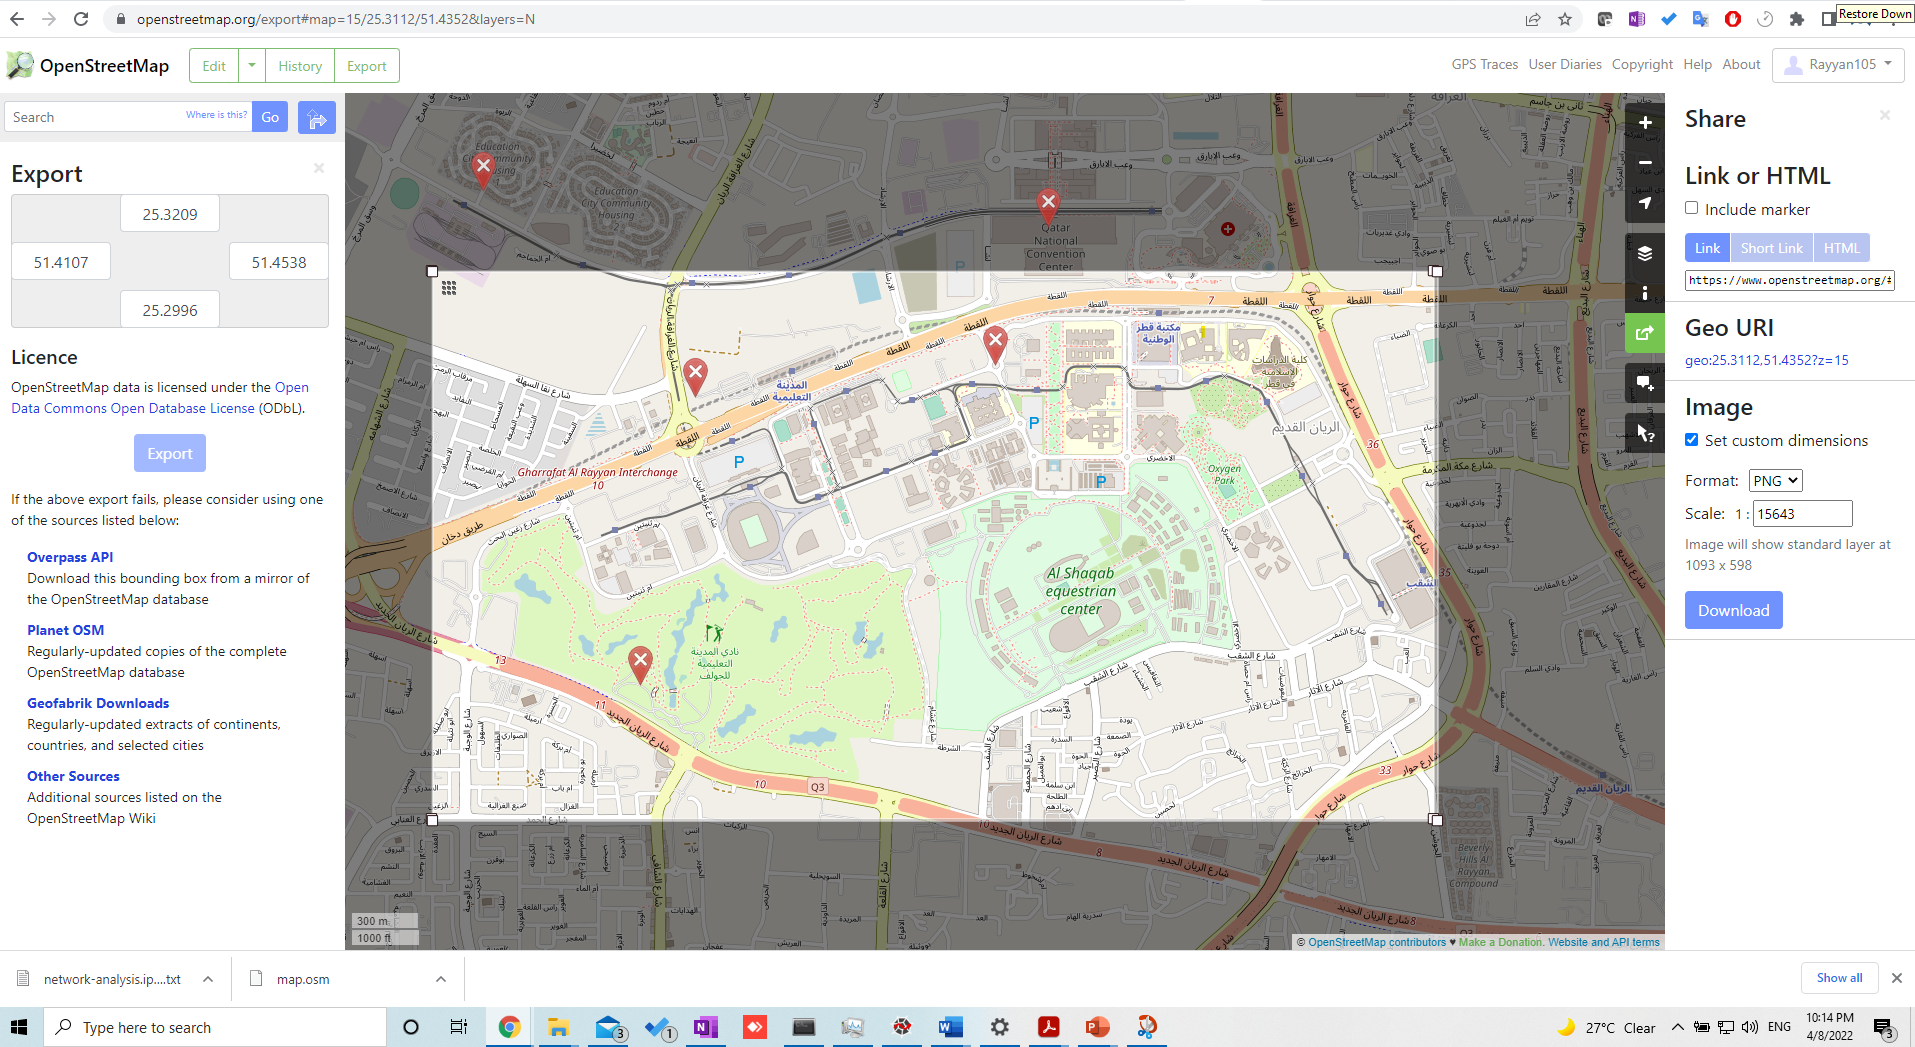

In [2]:
# graph from bounding box
north, south, east, west = 25.3209, 25.2996,51.4538, 51.4107, 
graph = ox.graph_from_bbox(north, south, east, west, network_type='walk')

In [3]:
graph

Plot the graph:

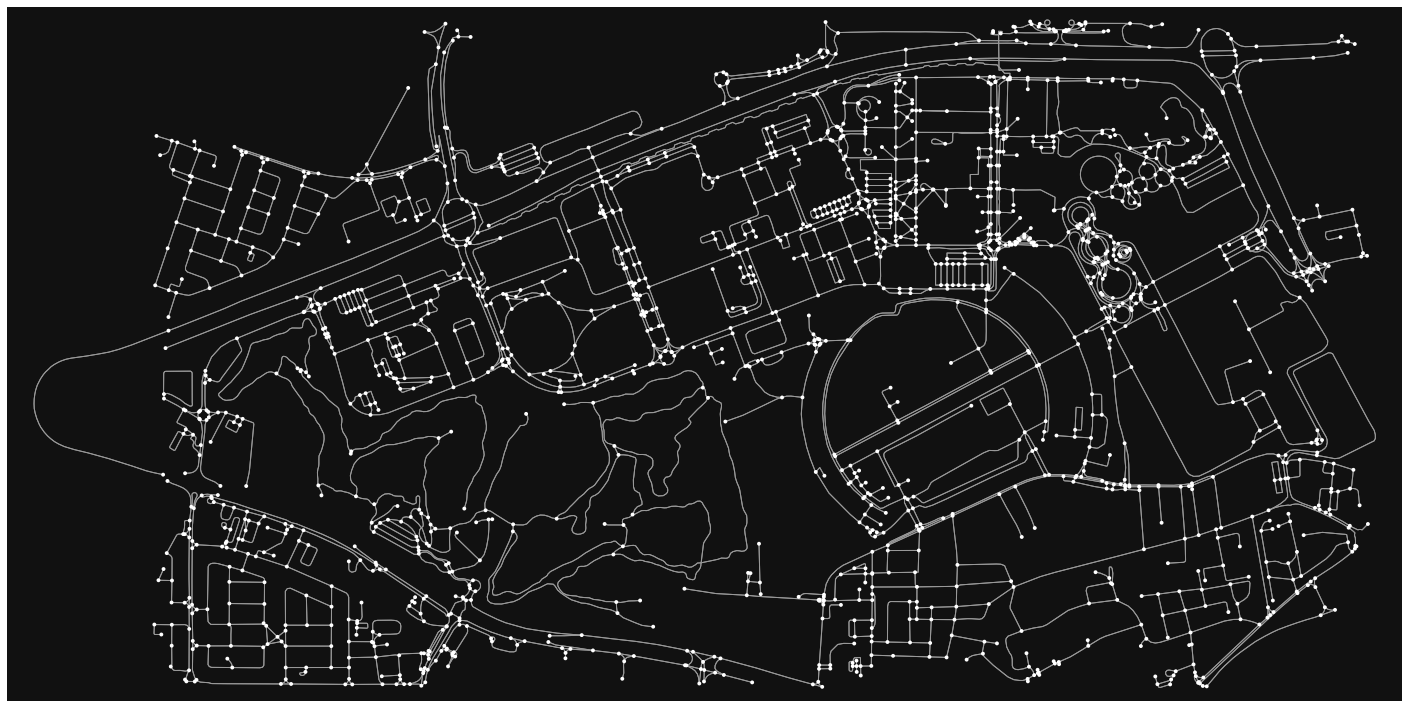

In [4]:
fig, ax = ox.plot_graph(graph,    
                        figsize=(25, 25),        #figure size to create if ax is None
                        bgcolor="#111111")    #background color of the plot)



 the data is in WGS84 format,need to reproject our data into a metric system before proceeding to the shortest path analysis.
Can re-project the graph from latitudes and longitudes to an appropriate UTM zone using the [project_graph()](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.projection.project_graph) function from OSMnx. 

convert MultiDiGraph to/from geopandas GeoDataFrames

CRS: A pythonic Coordinate Reference System manager.

In [5]:
# Project the data
graph_proj = ox.project_graph(graph) 

In [6]:
# Get Edges and Nodes
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [7]:
print("Coordinate system:", edges_proj.crs)

Coordinate system: +proj=utm +zone=39 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


In [8]:
edges_proj.head()

osmid  oneway lanes         name  \
u          v          key                                          
282869314  6952756355 0     490200857   False     2  شارع الوجبة   
           6952756344 0     742717351   False     1          NaN   
           9571534387 0    1032368301   False     1  شارع الوجبة   
6952756355 2611062100 0     490200857   False     2  شارع الوجبة   
           2611062105 0     255416201   False     1       ارميلة   

                                 highway maxspeed   length  \
u          v          key                                    
282869314  6952756355 0         tertiary       80  116.688   
           6952756344 0    tertiary_link      NaN  118.811   
           9571534387 0         tertiary       80   55.229   
6952756355 2611062100 0         tertiary       80   25.722   
           2611062105 0      residential      NaN   20.762   

                                                                    geometry  \
u          v          key                                                      
282869314  6952756355 0    LINESTRING (541490.242 2798819.973, 541485.554...   
           6952756344 0    LINESTRING (541490.242 2798819.973, 541490.804...   
           9571534387 0    LINESTRING (541490.242 2798819.973, 541493.921...   
6952756355 2611062100 0    LINESTRING (541485.143 2798703.950, 541484.869...   
           2611062105 0    LINESTRING (541485.143 2798703.950, 541489.428...   

                          junction service tunnel access bridge  
u          v          key                                        
282869314  6952756355 0        NaN     NaN    NaN    NaN    NaN  
           6952756344 0        NaN     NaN    NaN    NaN    NaN  
           9571534387 0        NaN     NaN    NaN    NaN    NaN  
6952756355 2611062100 0        NaN     NaN    NaN    NaN    NaN  
           2611062105 0        NaN     NaN    NaN    NaN    NaN

In [9]:
nodes_proj

,y,x,street_count,lon,lat,highway,ref,geometry
osmid,,,,,,,,
282869314,2.798820e+06,541490.242165,3,51.412184,25.305321,NaN,NaN,POINT (541490.242 2798819.973)
6952756355,2.798704e+06,541485.143033,3,51.412130,25.304273,NaN,NaN,POINT (541485.143 2798703.950)
6952756344,2.798825e+06,541481.176438,3,51.412094,25.305369,NaN,NaN,POINT (541481.176 2798825.261)
9571534387,2.798865e+06,541518.015909,3,51.412461,25.305730,crossing,NaN,POINT (541518.016 2798865.372)
282869318,2.798256e+06,543297.357637,4,51.430119,25.300178,NaN,NaN,POINT (543297.358 2798256.201)
...,...,...,...,...,...,...,...,...
9624989291,2.800070e+06,541366.380626,1,51.410992,25.316610,NaN,NaN,POINT (541366.381 2800069.726)
9625140963,2.799189e+06,543966.245264,3,51.436793,25.308579,NaN,NaN,POINT (543966.245 2799188.582)
9625140962,2.799204e+06,543994.670194,1,51.437076,25.308721,NaN,NaN,POINT (543994.670 2799204.388)


Furthermore, we can check the epsg code of this projection using pyproj CRS:

In [10]:
CRS(edges_proj.crs).to_epsg()

32639

## Shortest path analysis

calculate the shortest path between two points using the [shortest path function in Networkx](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html#shortest-path). 

In [11]:
import copy

In [12]:
# Set place name
start_building  = "Liberal Arts and Sciences Building"#"Qatar National Library"#"Penrose House"#"Qatar National Library"#"Penrose House"#"Maria 01, Helsinki"#Penrose House,

In [13]:
# Set place name
destination_building = "Education City Mosque"#"Qatar National Library"#"Education City Mosque"#"Qatar National Library"#"Maria 01, Helsinki"#Penrose House,


In [14]:
# Geocode the place name
geocoded_place = ox.geocode_to_gdf(start_building)

In [15]:
origin_lat = copy.deepcopy(geocoded_place['lat'][0]) 
origin_lon = copy.deepcopy(geocoded_place['lon'][0])

In [16]:
# Check the result
geocoded_place

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((51.43318 25.31616, 51.43321 25.31605...",25.316454,25.314439,51.435653,51.433176,237113176,way,684407875,25.315464,51.434505,"Liberal Arts and Sciences Building, Al Luqta S...",amenity,university,0.501


 project the data into the correct crs:

In [17]:
# Re-project 
geocoded_place.to_crs(CRS(edges_proj.crs), inplace=True)

In [18]:
# Get centroid as shapely point
origin = geocoded_place["geometry"].centroid.values[0]

In [19]:
print(origin)

POINT (543722.8391547147 2799961.8160893694)


In [20]:
nodes_proj.head()

,y,x,street_count,lon,lat,highway,ref,geometry
osmid,,,,,,,,
282869314,2.798820e+06,541490.242165,3,51.412184,25.305321,NaN,NaN,POINT (541490.242 2798819.973)
6952756355,2.798704e+06,541485.143033,3,51.412130,25.304273,NaN,NaN,POINT (541485.143 2798703.950)
6952756344,2.798825e+06,541481.176438,3,51.412094,25.305369,NaN,NaN,POINT (541481.176 2798825.261)
9571534387,2.798865e+06,541518.015909,3,51.412461,25.305730,crossing,NaN,POINT (541518.016 2798865.372)
282869318,2.798256e+06,543297.357637,4,51.430119,25.300178,NaN,NaN,POINT (543297.358 2798256.201)


In [21]:
# Geocode the place name
geocoded_place = ox.geocode_to_gdf(destination_building)

# Re-project 
geocoded_place.to_crs(CRS(edges_proj.crs), inplace=True)
# Get centroid as shapely point
destination = geocoded_place["geometry"].centroid.values[0]

In [22]:
destination_lat = copy.deepcopy(geocoded_place['lat'][0])
destination_lon =copy.deepcopy( geocoded_place['lon'][0])

In [23]:
geocoded_place

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((544873.177 2800141.046, 544881.272 2...",25.318432,25.316367,51.44782,51.445835,283634124,relation,10740451,25.317411,51.446901,"Education City Mosque, Al Luqta Street, Buildi...",amenity,place_of_worship,0.301


In [24]:
geocoded_place['lat'][0]

25.31741075

#### Nearest node

find the nearest graph nodes (and their node IDs) to these points using OSMnx [get_nearest_node](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.utils.get_nearest_node). 


According to the documentation of this function, we need to parse Point coordinates as coordinate-tuples in this order: `latitude, longitude`(or `y, x`). As our data is now projected to UTM projection, we need to specify with `method` parameter that the function uses `'euclidean'` distances to calculate the distance from the point to the closest node (with decimal derees, use `'haversine'`, which determines the great-circle distances). The method parameter is important if you want to know the actual distance between the Point and the closest node which you can retrieve by specifying parameter `return_dist=True`.


In [25]:
destination.y

2800145.935830338

In [26]:
# Get origin x and y coordinates
orig_xy = (origin.y, origin.x)

# Get target x and y coordinates
target_xy = (destination.y, destination.x)

In [27]:
print((origin_lat,origin_lon))

(25.31546365, 51.43450525816654)


In [28]:
# Find the node in the graph that is closest to the origin point (here, we want to get the node id)
orig_node_id = ox.get_nearest_node(graph, (origin_lat,origin_lon), method='euclidean')
orig_node_id

/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


7604318324

In [29]:
# Find the node in the graph that is closest to the target point (here, we want to get the node id)
target_node_id = ox.get_nearest_node(graph,(destination_lat,destination_lon))#, method='euclidean')
target_node_id

/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


7234271193

Now we have the IDs for the closest nodes that were found from the graph to the origin and target points that we specified. 

Let's retrieve the node information from the `nodes_proj` GeoDataFrame by passing the ids to the `loc` indexer

In [30]:
# Retrieve the rows from the nodes GeoDataFrame based on the node id (node id is the index label)
orig_node = nodes_proj.loc[orig_node_id]
target_node = nodes_proj.loc[target_node_id]

In [31]:
orig_node

y                                             2799903.746981
x                                               543750.30672
street_count                                               3
lon                                                51.434671
lat                                                25.315043
highway                                                  NaN
ref                                                      NaN
geometry        POINT (543750.3067203122 2799903.7469807705)
Name: 7604318324, dtype: object

In [32]:
target_node

y                                             2800124.674178
x                                              544958.020756
street_count                                               3
lon                                                51.446677
lat                                                25.317003
highway                                                  NaN
ref                                                      NaN
geometry        POINT (544958.0207559553 2800124.6741782357)
Name: 7234271193, dtype: object

Let's also create a GeoDataFrame that contains these points

In [33]:
# Create a GeoDataFrame from the origin and target points
od_nodes = gpd.GeoDataFrame([orig_node, target_node], geometry='geometry', crs=nodes_proj.crs)
od_nodes.head()

,y,x,street_count,lon,lat,highway,ref,geometry
7604318324,2.799904e+06,543750.306720,3,51.434671,25.315043,NaN,NaN,POINT (543750.307 2799903.747)
7234271193,2.800125e+06,544958.020756,3,51.446677,25.317003,NaN,NaN,POINT (544958.021 2800124.674)


#### Routing




In [34]:
import time

In [35]:
results=[]

Finding shortest path using dijkstra algorithm

In [36]:
# Calculate the shortest path
time0 = time.time()
route = nx.dijkstra_path(G=graph_proj, source=orig_node_id, target=target_node_id, weight='length')
Time = time.time()-time0
print(Time)
# Show what we have
print(route)
results.append(['Dijkstra',"{:.2f}".format(Time*1000),len(route)])

0.00980830192565918
[7604318324, 7604318323, 7604318322, 7604318317, 7604318315, 1715726607, 1715726610, 1715726612, 1715726601, 1715698221, 4728408565, 4728408555, 1715785972, 1715785976, 1715785970, 1715698218, 1715698215, 1715698210, 4726962307, 1715698205, 1715698208, 1715698236, 9563487698, 7233660423, 7233660430, 7233660436, 7233660414, 6457039718, 7233660925, 7233660543, 7233660917, 7193806285, 7193806204, 7193917292, 7233914429, 7233914448, 7193917271, 7193917334, 6457190136, 7233914453, 6409125252, 7234260123, 6409125246, 7234271193]


In [37]:
def distance(a,b):
    return ( nx.dijkstra_path_length(graph_proj,a,b, 'length') + len(nx.dijkstra_path(graph_proj, a, b)) )

Finding shortest path using A* without heurisitc funciton

In [38]:
# Calculate the shortest path
time0 = time.time()
route = nx.astar_path(G=graph_proj, source=orig_node_id,target=target_node_id, weight='length')#,heuristic=distance)
Time = time.time()-time0
print(Time)
# Show what we have
print(route)
results.append(['A* ',"{:.2f}".format(Time*1000),len(route)])

0.02126455307006836
[7604318324, 7604318323, 7604318322, 7604318317, 7604318315, 1715726607, 1715726610, 1715726612, 1715726601, 1715698221, 4728408565, 4728408555, 1715785972, 1715785976, 1715785970, 1715698218, 1715698215, 1715698210, 4726962307, 1715698205, 1715698208, 1715698236, 9563487698, 7233660423, 7233660430, 7233660436, 7233660414, 6457039718, 7233660925, 7233660543, 7233660917, 7193806285, 7193806204, 7193917292, 7233914429, 7233914448, 7193917271, 7193917334, 6457190136, 7233914453, 6409125252, 7234260123, 6409125246, 7234271193]


Finding shortest path using A* with heurisitc funciton

In [39]:
# Calculate the shortest path
time0 = time.time()
route = nx.astar_path(G=graph_proj, source=orig_node_id,target=target_node_id, weight='length',heuristic=distance)
Time = time.time()-time0
print(Time)
# Show what we have
print(route)
results.append(['A* with heuristic',"{:.2f}".format(Time*1000),len(route)])

0.7057576179504395
[7604318324, 7604318323, 7604318322, 7604318317, 7604318315, 1715726607, 1715726610, 1715726612, 1715726601, 1715698221, 4728408565, 4728408555, 1715785972, 1715785976, 1715785970, 1715698218, 1715698219, 7233660466, 1715698244, 1715698248, 1715698239, 1715698236, 9563487698, 7233660423, 7233660430, 7233660436, 7233660414, 6457039718, 7233660925, 7233660543, 7233660917, 7193806285, 7193806204, 7193917292, 7233914429, 7233914448, 7193917271, 7193917334, 6457190136, 7233914453, 6409125252, 7234260123, 6409125246, 7234271193]


#Algorithms Comparision summary:

In [40]:
df=pd.DataFrame(results,columns=['Algorithm','Time (ms)','Path length'])
df

,Algorithm,Time (ms),Path length
0,Dijkstra,9.81,44
1,A*,21.26,44
2,A* with heuristic,705.76,44


#Shortest path results:

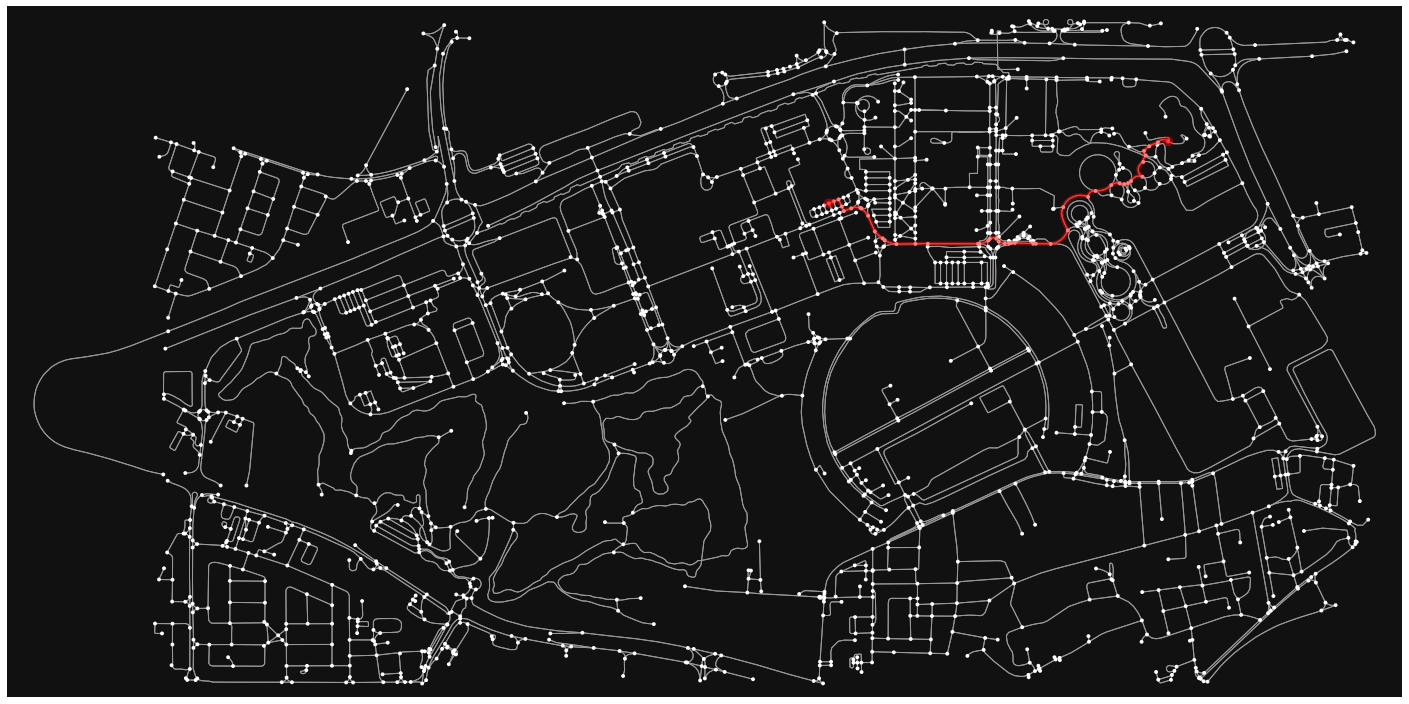

In [41]:
# Plot the shortest path
fig, ax = ox.plot_graph_route(graph_proj, route ,   
                              figsize=(25, 25),        #figure size to create if ax is None
    bgcolor="#111111")    #background color of the plot)

## Shortest path results with building: 


In [42]:
# Get the nodes along the shortest path
route_nodes = nodes_proj.loc[route]
route_nodes

,y,x,street_count,lon,lat,highway,ref,geometry
osmid,,,,,,,,
7604318324,2.799904e+06,543750.306720,3,51.434671,25.315043,NaN,NaN,POINT (543750.307 2799903.747)
7604318323,2.799911e+06,543767.344395,3,51.434841,25.315107,NaN,NaN,POINT (543767.344 2799910.878)
7604318322,2.799918e+06,543784.735522,3,51.435014,25.315168,NaN,NaN,POINT (543784.736 2799917.645)
7604318317,2.799892e+06,543796.291875,4,51.435128,25.314940,NaN,NaN,POINT (543796.292 2799892.446)
7604318315,2.799876e+06,543803.420027,3,51.435198,25.314795,NaN,NaN,POINT (543803.420 2799876.379)
1715726607,2.799886e+06,543829.769925,3,51.435460,25.314881,NaN,NaN,POINT (543829.770 2799886.077)
1715726610,2.799888e+06,543862.225579,3,51.435783,25.314895,NaN,NaN,POINT (543862.226 2799887.688)
1715726612,2.799886e+06,543866.691632,3,51.435827,25.314875,NaN,NaN,POINT (543866.692 2799885.510)
1715726601,2.799860e+06,543890.016708,3,51.436058,25.314641,NaN,NaN,POINT (543890.017 2799859.674)


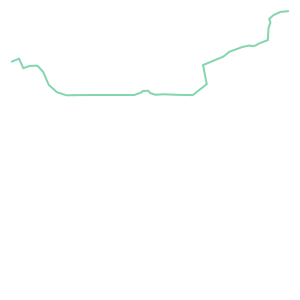

In [43]:
from shapely.geometry import LineString, Point

# Create a geometry for the shortest path
route_line = LineString(list(route_nodes.geometry.values))
route_line

In [44]:
# Create a GeoDataFrame
route_geom = gpd.GeoDataFrame([[route_line]], geometry='geometry', crs=edges_proj.crs, columns=['geometry'])

# Add a list of osmids associated with the route
# route_geom.loc[0, 'osmids'] = str(list(route_nodes['osmid'].values))

# Calculate the route length
# route_geom['length_m'] = route_geom.length

# route_geom.head()



- Get buildings:

In [45]:
tags = {'building': True}
# buildings = ox.geometries_from_place(place, tags)
buildings = ox.geometries_from_bbox(north, south, east, west, tags)


In [46]:
len(buildings)

302

In [47]:
buildings

geometry  \
element_type osmid                                                          
way          159446423  POLYGON ((51.43790 25.31505, 51.43809 25.31487...   
             159446424  POLYGON ((51.43855 25.31520, 51.43836 25.31503...   
             159446425  POLYGON ((51.43836 25.31462, 51.43855 25.31444...   
             159453474  POLYGON ((51.44094 25.31870, 51.44094 25.31744...   
             159738204  POLYGON ((51.43442 25.31392, 51.43465 25.31400...   
...                                                                   ...   
relation     9494589    POLYGON ((51.44103 25.31535, 51.44112 25.31536...   
             9656956    POLYGON ((51.42950 25.31363, 51.42949 25.31336...   
             10725661   POLYGON ((51.43609 25.32077, 51.43609 25.32106...   
             10736330   POLYGON ((51.43813 25.31636, 51.43813 25.31644...   
             10740451   POLYGON ((51.44600 25.31729, 51.44605 25.31729...   

                       barrier railway  \
element_type osmid                       
way          159446423     NaN     NaN   
             159446424     NaN     NaN   
             159446425     NaN     NaN   
             159453474     NaN     NaN   
             159738204     NaN     NaN   
...                        ...     ...   
relation     9494589       NaN     NaN   
             9656956       NaN     NaN   
             10725661      NaN     NaN   
             10736330      NaN     NaN   
             10740451      NaN     NaN   

                                                                    image  \
element_type osmid                                                          
way          159446423                                                NaN   
             159446424                                                NaN   
             159446425                                                NaN   
             159453474  https://images.mapillary.com/9jaZmq_V3v2mujXbj...   
             159738204                                                NaN   
...                                                                   ...   
relation     9494589                                                  NaN   
             9656956                                                  NaN   
             10725661                                                 NaN   
             10736330                                                 NaN   
             10740451                                                 NaN   

                                                                mapillary  \
element_type osmid                                                          
way          159446423                                                NaN   
             159446424                                                NaN   
             159446425                                                NaN   
             159453474  https://www.mapillary.com/map/im/9jaZmq_V3v2mu...   
             159738204                                                NaN   
...                                                                   ...   
relation     9494589                                                  NaN   
             9656956                                                  NaN   
             10725661                                                 NaN   
             10736330                                                 NaN   
             10740451                                                 NaN   

                                                                    nodes  \
element_type osmid                                                          
way          159446423  [1715666719, 1715666698, 1715666683, 171566665...   
             159446424  [1715666720, 1715666716, 1715666715, 171566672...   
             159446425  [1715666665, 1715666646, 1715666647, 171566666...   
             159453474  [1715698319, 1715698297, 1715698298, 171569832...   
             159738204  [1718417258, 1718417264, 1

In [48]:
print(buildings['name'])

element_type  osmid    
way           159446423                                 NaN
              159446424                                 NaN
              159446425                                 NaN
              159453474              Qatar National Library
              159738204                                 NaN
                                         ...               
relation      9494589         Education City Student Center
              9656956                                   NaN
              10725661     Qatar National Convention Center
              10736330                                  NaN
              10740451                Education City Mosque
Name: name, Length: 302, dtype: object


In [49]:
buildings.columns

Index(['geometry', 'barrier', 'railway', 'image', 'mapillary', 'nodes',
       'leisure', 'building', 'addr:city', 'addr:street', 'amenity',
       'architect', 'building:levels', 'building:material', 'description',
       'name', 'name:ar', 'name:en', 'operator', 'roof:shape', 'website',
       'wikipedia', 'addr:housenumber', 'name:de', 'note', 'tourism', 'url',
       'wikidata', 'religion', 'opening_hours', 'phone', 'source', 'office',
       'shop', 'layer', 'location', 'public_transport', 'tram', 'parking',
       'alt_name', 'government', 'short_name', 'mapper', 'brand',
       'payment:cash', 'payment:credit_cards', 'payment:debit_cards',
       'self_service', 'wheelchair', 'ways', 'type'],
      dtype='object')

re-project buildings

In [50]:
buildings_proj = buildings.to_crs(CRS(edges_proj.crs))

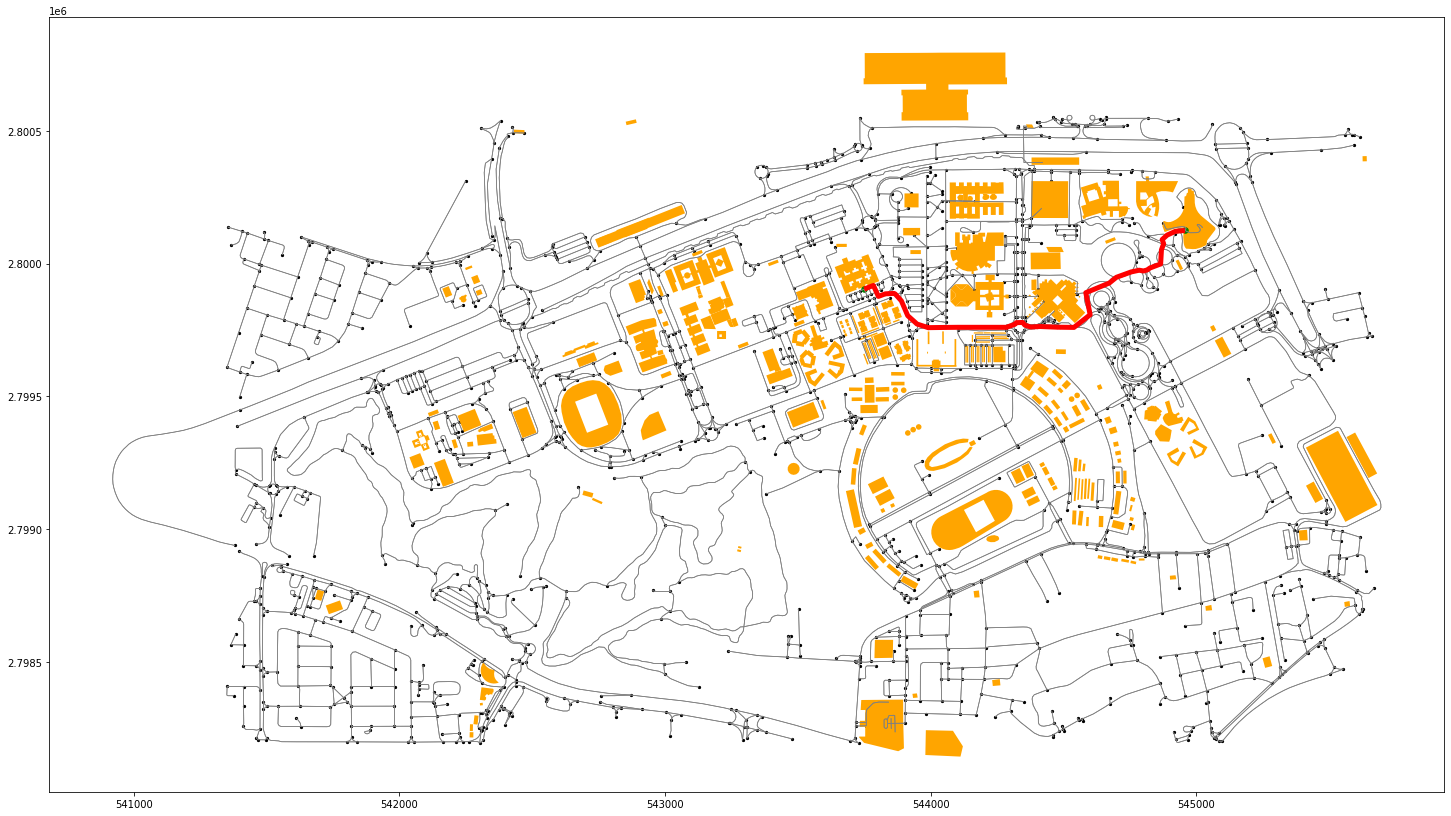

In [51]:

# Plot edges and nodes
ax = edges_proj.plot(linewidth=0.75, color='gray',figsize=(25,25))
ax = nodes_proj.plot(ax=ax, markersize=5, color='black')

# Add buildings
ax = buildings_proj.plot(ax=ax, facecolor='orange')#, alpha=0.7)

# Add the route
ax = route_geom.plot(ax=ax, linewidth=5,  color='r',edgecolors='black')#linestyle='--',

# Add the origin and destination nodes of the route
ax = od_nodes.plot(ax=ax, markersize=30, color='green')